In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'winequality-red.csv')

In [18]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1089,11.6,0.41,0.54,1.5,0.095,22.0,41.0,0.99735,3.02,0.76,9.9,7
448,8.6,0.53,0.22,2.0,0.100,7.0,27.0,0.99670,3.20,0.56,10.2,6
581,12.3,0.50,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.6,5
1068,11.1,0.31,0.53,2.2,0.060,3.0,10.0,0.99572,3.02,0.83,10.9,7
289,11.6,0.42,0.53,3.3,0.105,33.0,98.0,1.00100,3.20,0.95,9.2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'fixed acidity'),
  Text(0, 1.5, 'volatile acidity'),
  Text(0, 2.5, 'citric acid'),
  Text(0, 3.5, 'residual sugar'),
  Text(0, 4.5, 'chlorides'),
  Text(0, 5.5, 'free sulfur dioxide'),
  Text(0, 6.5, 'total sulfur dioxide'),
  Text(0, 7.5, 'density'),
  Text(0, 8.5, 'pH'),
  Text(0, 9.5, 'sulphates'),
  Text(0, 10.5, 'alcohol'),
  Text(0, 11.5, 'quality')])

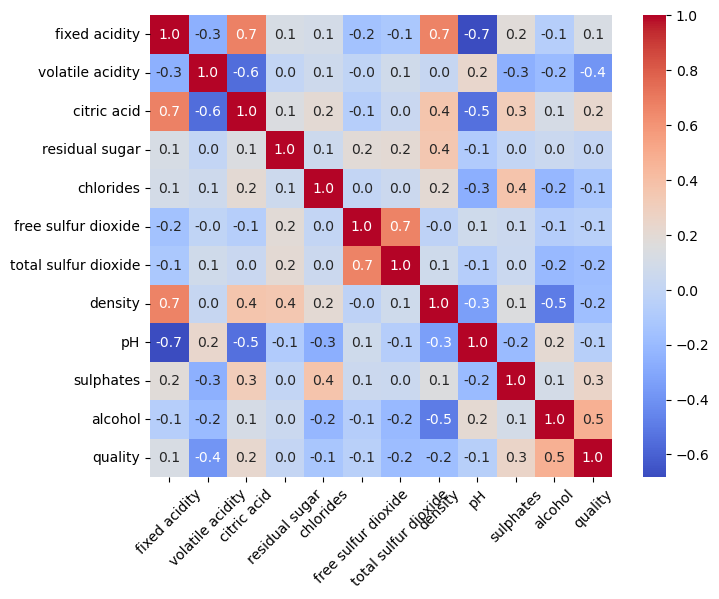

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.1f', square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

In [19]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


C:\Users\saqli\AppData\Local\Temp\ipykernel_4072\2908848721.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='quality', data = df, kind = 'count', palette='husl')


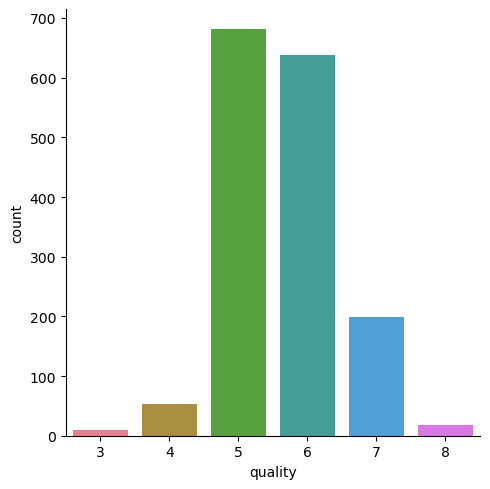

In [32]:
sns.catplot(x='quality', data = df, kind = 'count', palette='husl')

C:\Users\saqli\AppData\Local\Temp\ipykernel_4072\1021823791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='volatile acidity', data=df, palette='husl')


<Axes: xlabel='quality', ylabel='volatile acidity'>

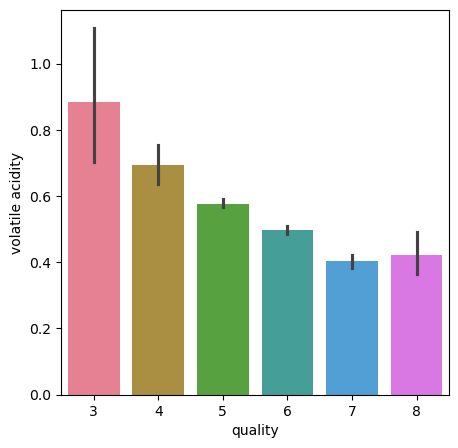

In [31]:
#volatile acidity vs quality
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y='volatile acidity', data=df, palette='husl')

C:\Users\saqli\AppData\Local\Temp\ipykernel_4072\3655437768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'quality', y = 'alcohol', data = df, palette='husl')


<Axes: xlabel='quality', ylabel='alcohol'>

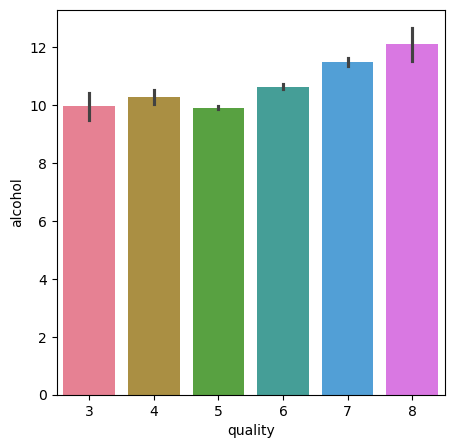

In [33]:
#Alcohol vs quality
plot = plt.figure(figsize=(5, 5))
sns.barplot(x = 'quality', y = 'alcohol', data = df, palette='husl')

C:\Users\saqli\AppData\Local\Temp\ipykernel_4072\670525505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'quality', y = 'sulphates', data = df, palette='husl')


<Axes: xlabel='quality', ylabel='sulphates'>

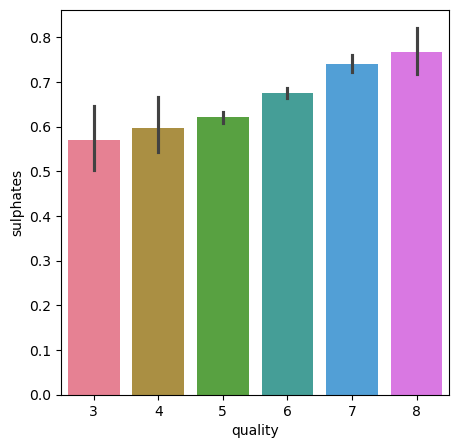

In [34]:
#Sulphates vs quality
plot = plt.figure(figsize=(5, 5))
sns.barplot(x = 'quality', y = 'sulphates', data = df, palette='husl')

C:\Users\saqli\AppData\Local\Temp\ipykernel_4072\3183472428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'quality', y = 'citric acid', data = df, palette='husl')


<Axes: xlabel='quality', ylabel='citric acid'>

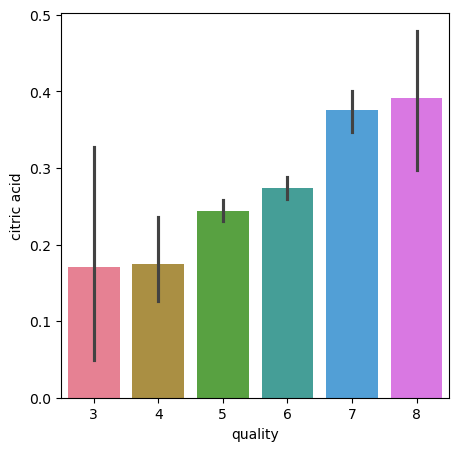

In [35]:
#Citric Acid vs quality
plot = plt.figure(figsize=(5, 5))
sns.barplot(x = 'quality', y = 'citric acid', data = df, palette='husl')

In [63]:
x = df[['volatile acidity', 'citric acid', 'sulphates', 'alcohol']]

In [64]:
x.head()

,volatile acidity,citric acid,sulphates,alcohol
0,0.70,0.00,0.56,9.4
1,0.88,0.00,0.68,9.8
2,0.76,0.04,0.65,9.8
3,0.28,0.56,0.58,9.8
4,0.70,0.00,0.56,9.4


In [65]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Binarization

In [66]:
y = df['quality'].apply(lambda y_test: 1 if y_test >= 7 else 0)

In [67]:
y.sample(5)

662     0
601     0
1261    0
833     0
1238    0
Name: quality, dtype: int64

In [68]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

TRAIN and SPLIT

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
x_train

array([[ 0.90601191,  0.20039205,  0.48302886,  1.10483337],
       [-1.77549685,  0.66254621, -0.40216729,  1.38643512],
       [-0.76993107,  1.02199944,  0.54204194, -0.58477711],
       ...,
       [ 0.51495855, -1.08336951, -0.69723268, -0.86637886],
       [-1.83136161,  0.4057939 ,  0.83710732,  1.38643512],
       [-1.32857872, -0.05636026, -0.69723268,  2.8883111 ]])

In [71]:
clf = RandomForestClassifier()

In [72]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [73]:
x_prediction = clf.predict(x_test)
x_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [74]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [75]:
accuracy = accuracy_score(x_prediction, y_test)

In [76]:
print (accuracy)

0.89375


In [78]:
input_data = (7.4, 0.7, 0.56, 9.4)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)
predicted_on_input = clf.predict(std_data)

c:\Users\saqli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [82]:
if predicted_on_input[0] == 0:
    print('Qulity of wine is good')
else:
    print('Quality of wine is bad')

Qulity of wine is good
